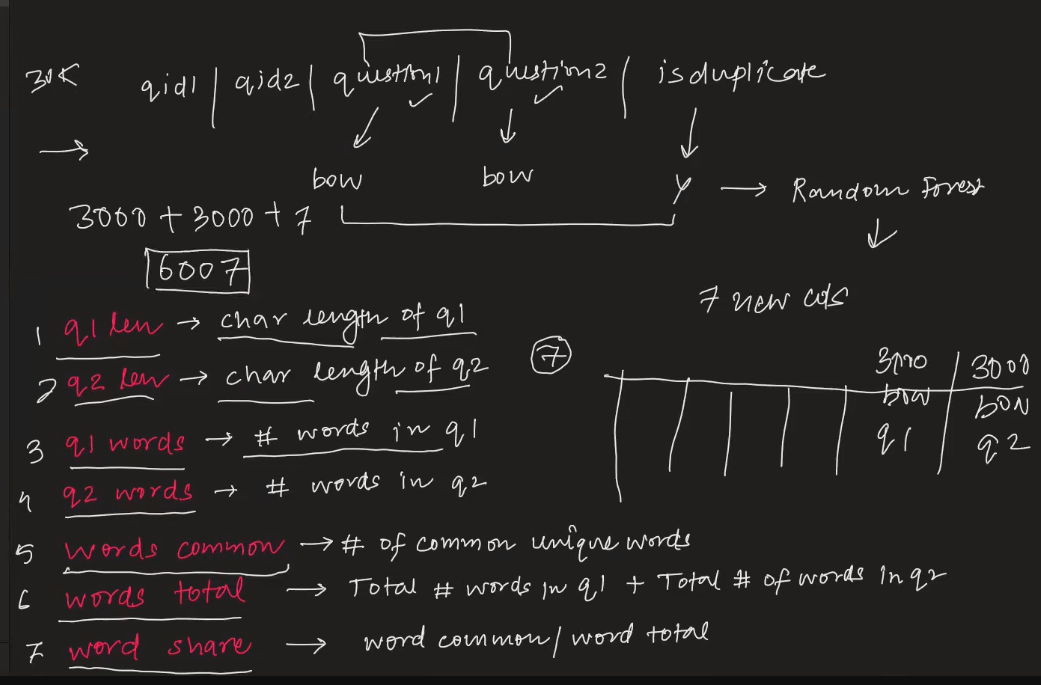

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
big_df = pd.read_csv('questions.csv')
# df = df[:30000]
df = big_df.sample(30000)
print(big_df.shape)
print(df.shape)
df.head()

(404351, 6)
(30000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
71620,71620,142338,142339,Why is kinetic energy important?,How is kinetic energy measured?,0
229309,229309,451888,451889,Can the destination be the means to itself?,What is the meaning of destination?,0
219701,219701,433125,433126,How Much Money Can I Earn From My YouTube Vide...,What Filipino foods can I serve to my white fr...,0
283445,283445,557118,557119,Is Zee news a BJP owned channel?,Why do I get a feeling that Zee News is pro BJ...,1
4071,4071,8140,8141,How do I choose domains for a project?,How do I find our project domain?,0


In [118]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       0
is_duplicate    0
dtype: int64

In [119]:
df.dropna(axis=0,inplace=True)

In [120]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [121]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [122]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    18853
1    11146
Name: count, dtype: int64
is_duplicate
0    62.845428
1    37.154572
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

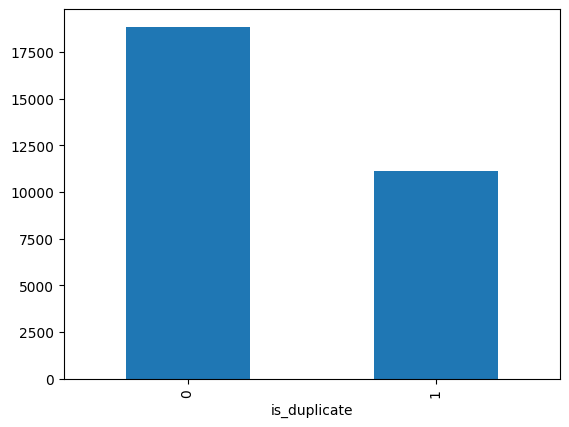

In [123]:
# check imbalance

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [124]:
# rep ques

qids = np.concat((df['qid1'].values,df['qid2'].values),axis=None)

print(qids)
print('No of qids = ', len(qids))
# print(np.unique(qids))
print('No of uniq qids = ', len(np.unique(qids)))

[577163 312523 430644 ... 590728 619159 266195]
No of qids =  59998
No of uniq qids =  59813


0        577163
1        312523
2        430644
3        248026
4        330870
          ...  
59993    639849
59994    259467
59995    590728
59996    619159
59997    266195
Length: 59998, dtype: int64


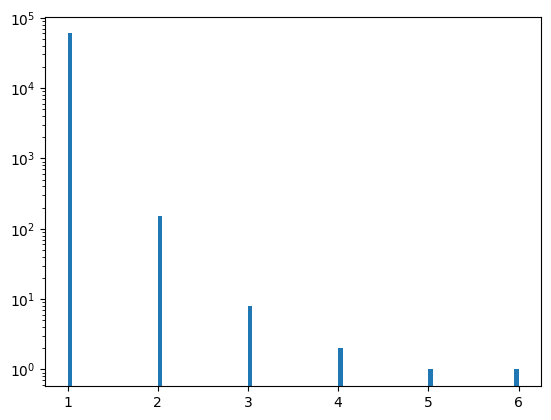

In [125]:
qids_ser = pd.Series(qids)
print(qids_ser)

plt.hist(qids_ser.value_counts(),bins=100)
plt.yscale('log')
plt.show()

Feat eng

In [126]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
293798,293798,577163,577164,How much does ziosk charge per device?,How much should I charge for food photography ...,0,38,102
158042,158042,312523,312524,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?,0,79,45
218423,218423,430644,430645,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0,83,86
125183,125183,248026,248027,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?,1,37,36
167411,167411,330870,330871,What happens if the whole world use the same c...,Why don't we have a universal currency?,0,54,39


In [127]:
df['q1_word_cnt'] = df['question1'].apply(lambda row: len(row.split(' ')))
df['q2_word_cnt'] = df['question2'].apply(lambda row: len(row.split(' ')))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt
293798,293798,577163,577164,How much does ziosk charge per device?,How much should I charge for food photography ...,0,38,102,7,19
158042,158042,312523,312524,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?,0,79,45,15,10
218423,218423,430644,430645,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0,83,86,12,13
125183,125183,248026,248027,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?,1,37,36,7,7
167411,167411,330870,330871,What happens if the whole world use the same c...,Why don't we have a universal currency?,0,54,39,10,7


In [128]:
def find_common_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1 & uniq_q2)

In [129]:
df['common_words_cnt'] = df.apply(find_common_words_cnt,axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt
293798,293798,577163,577164,How much does ziosk charge per device?,How much should I charge for food photography ...,0,38,102,7,19,4
158042,158042,312523,312524,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?,0,79,45,15,10,2
218423,218423,430644,430645,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0,83,86,12,13,11
125183,125183,248026,248027,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?,1,37,36,7,7,6
167411,167411,330870,330871,What happens if the whole world use the same c...,Why don't we have a universal currency?,0,54,39,10,7,1


In [130]:
def find_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1) + len(uniq_q2)

In [131]:
df['words_cnt'] = df.apply(find_words_cnt,axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt
293798,293798,577163,577164,How much does ziosk charge per device?,How much should I charge for food photography ...,0,38,102,7,19,4,21
158042,158042,312523,312524,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?,0,79,45,15,10,2,22
218423,218423,430644,430645,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0,83,86,12,13,11,25
125183,125183,248026,248027,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?,1,37,36,7,7,6,14
167411,167411,330870,330871,What happens if the whole world use the same c...,Why don't we have a universal currency?,0,54,39,10,7,1,16


In [132]:
df['words_share'] = round(df['common_words_cnt']/df['words_cnt'],3)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share
293798,293798,577163,577164,How much does ziosk charge per device?,How much should I charge for food photography ...,0,38,102,7,19,4,21,0.190
158042,158042,312523,312524,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?,0,79,45,15,10,2,22,0.091
218423,218423,430644,430645,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0,83,86,12,13,11,25,0.440
125183,125183,248026,248027,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?,1,37,36,7,7,6,14,0.429
167411,167411,330870,330871,What happens if the whole world use the same c...,Why don't we have a universal currency?,0,54,39,10,7,1,16,0.062


Analyze feats

min chars =  1
max chars =  314
mean chars =  59


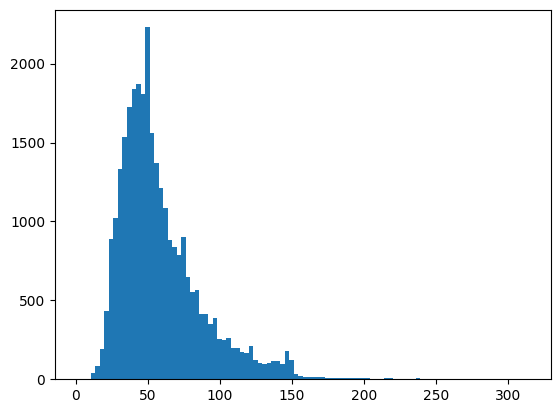

In [144]:
print('min chars = ', df['q1_len'].min())
print('max chars = ', df['q1_len'].max())
print('mean chars = ', int(df['q1_len'].mean()))

plt.hist(df['q1_len'],bins=100)
plt.show()

min chars =  3
max chars =  1151
mean chars =  59


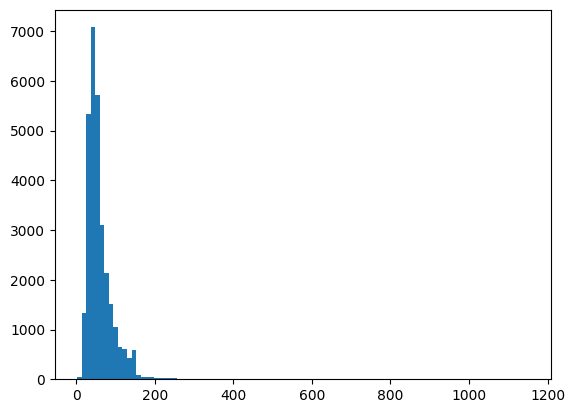

In [149]:
print('min chars = ', df['q2_len'].min())
print('max chars = ', df['q2_len'].max())
print('mean chars = ', int(df['q2_len'].mean()))

plt.hist(df['q2_len'],bins=100)
plt.show()

min chars =  1
max chars =  65
mean chars =  10


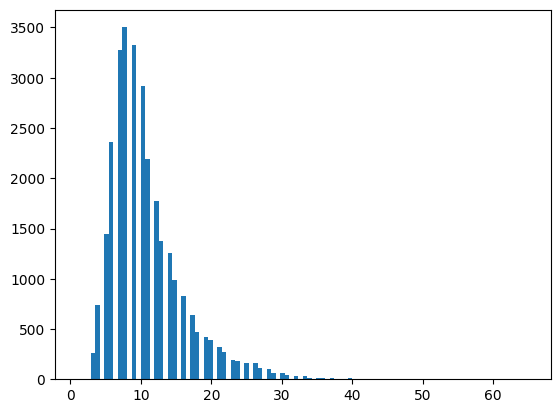

In [150]:
print('min chars = ', df['q1_word_cnt'].min())
print('max chars = ', df['q1_word_cnt'].max())
print('mean chars = ', int(df['q1_word_cnt'].mean()))

plt.hist(df['q1_word_cnt'],bins=100)
plt.show()

min chars =  1
max chars =  237
mean chars =  11


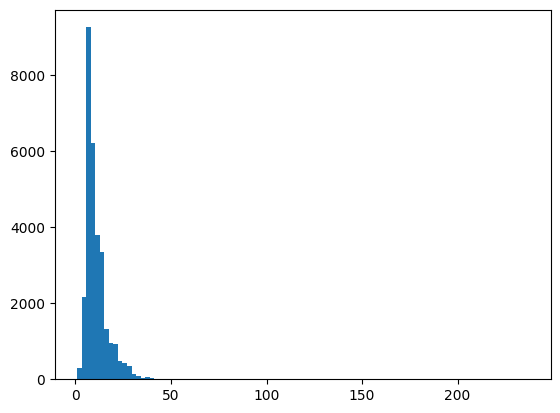

In [151]:
print('min chars = ', df['q2_word_cnt'].min())
print('max chars = ', df['q2_word_cnt'].max())
print('mean chars = ', int(df['q2_word_cnt'].mean()))

plt.hist(df['q2_word_cnt'],bins=100)
plt.show()

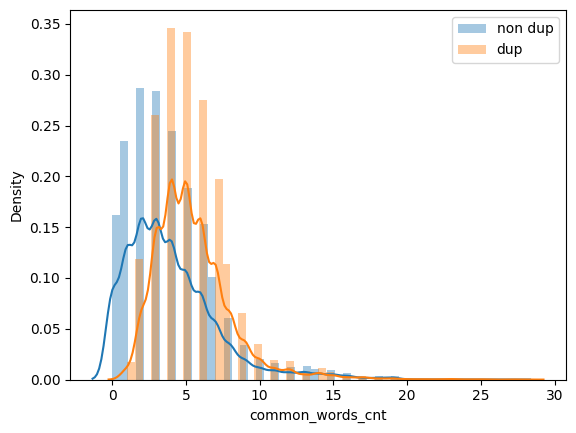

In [161]:
sns.distplot(df[df['is_duplicate']==0]['common_words_cnt'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['common_words_cnt'],label='dup')
plt.legend()
plt.show()

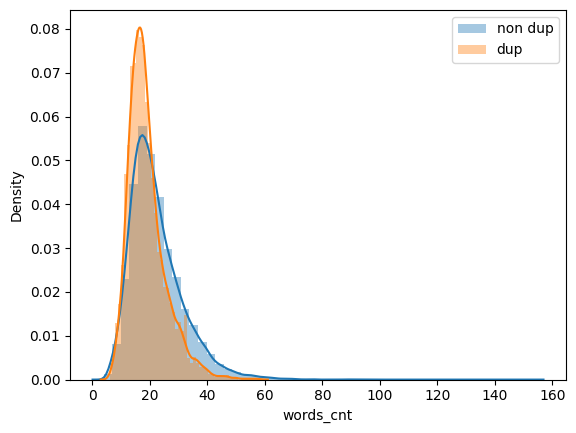

In [162]:
sns.distplot(df[df['is_duplicate']==0]['words_cnt'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['words_cnt'],label='dup')
plt.legend()
plt.show()

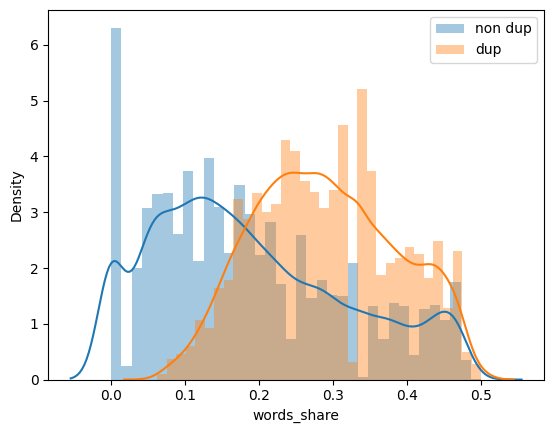

In [163]:
sns.distplot(df[df['is_duplicate']==0]['words_share'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['words_share'],label='dup')
plt.legend()
plt.show()

In [164]:
qdf = df[['question1','question2']]
qdf.head()

,question1,question2
293798,How much does ziosk charge per device?,How much should I charge for food photography ...
158042,"Why was the ""Earth"" named Earth? Who named it?...",What is the name of the first woman on earth?
218423,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...
125183,What are the best hotels in Varanasi?,What are the top hotels in Varanasi?
167411,What happens if the whole world use the same c...,Why don't we have a universal currency?


In [167]:
fin_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(fin_df.shape)
fin_df.head()

(29999, 8)


,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share
293798,0,38,102,7,19,4,21,0.190
158042,0,79,45,15,10,2,22,0.091
218423,0,83,86,12,13,11,25,0.440
125183,1,37,36,7,7,6,14,0.429
167411,0,54,39,10,7,1,16,0.062


In [168]:
ques = list(qdf['question1']) + list(qdf['question2'])

In [170]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(ques).toarray(),2)

In [173]:
temp_df1 = pd.DataFrame(q1_arr, index= qdf.index)
temp_df2 = pd.DataFrame(q2_arr, index= qdf.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)

temp_df.shape

(29999, 6000)

In [174]:
fin_df = pd.concat([fin_df,temp_df],axis=1)

print(fin_df.shape)
fin_df.head()

(29999, 6008)


,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
293798,0,38,102,7,19,4,21,0.190,0,0,...,0,0,0,0,0,0,0,0,0,0
158042,0,79,45,15,10,2,22,0.091,0,0,...,0,0,0,0,0,0,0,0,0,0
218423,0,83,86,12,13,11,25,0.440,0,0,...,0,0,0,0,0,0,0,0,0,0
125183,1,37,36,7,7,6,14,0.429,0,0,...,0,0,0,0,0,0,0,0,0,0
167411,0,54,39,10,7,1,16,0.062,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fin_df.iloc[:,1:].values, fin_df['is_duplicate'].values, test_size=0.2, random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7625

In [180]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7625

# Advanced Features

## 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question.
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question.
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions.
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions.
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions.
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions.
- **last_word_eq**: 1 if the last word in the two questions is the same, 0 otherwise.
- **first_word_eq**: 1 if the first word in the two questions is the same, 0 otherwise.

## 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words).
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words).
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question.

## 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy.
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy.
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy.
- **token_set_ratio**: token_set_ratio from fuzzywuzzy.
